# Independet variable transformation

## Welcome to Signals and Systems: Understanding Transformations of Independent Variables
Welcome to your first hands-on experience with Signals and Systems in a Jupyter Notebook!
In this assignment, you will explore how transformations of the independent variable affect a signal.
we are going to do the implementation and visualize signal manipulation using `matplotlib`.

#### What You Need to Know

You may already be familiar with the fundamental idea behind this topic from high school mathematics. Specifically, if you have studied the section `انتقال تابع` in the `حسابان` course, then this should be a smooth transition for you. However, instead of just theoretical study, we will take a computational approach, where you will write and execute Python code to manipulate signals and observe their behavior.

---


Before we dive into signal transformations, always ensure that you have imported the necessary libraries. Run the following code first:

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Now, let's define our base signal 𝑓(𝑡) as follows:
$$
f(t) =
\begin{cases} 
t + 1, & -1 \leq t < 0, \\
1, & 0 \leq t \leq 2.
\end{cases}
$$
The following Python function implements this piecewise-defined signal:

In [6]:
def base_signal(t):
    if -1 <= t < 0:
        return t + 1
    elif 0 <= t <= 2:
        return 1
    else:
        return 0

now let's plot that function using the `matplotlib`:

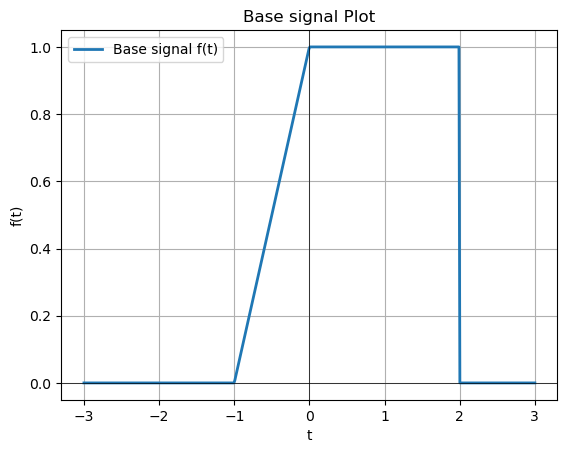

In [92]:
# Generate t values
t_values = np.linspace(-3, 3, 500)
f_values = np.array([base_signal(t) for t in t_values])

# Plot the function
plt.plot(t_values, f_values, label="Base signal f(t)", linewidth=2)
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Base signal Plot")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

### note: Understanding `np.linspace()` in Plotting
One important aspect of plotting that’s worth mentioning is the following line of code:
```python
t_values = np.linspace(-3, 3, 500)
```
This line generates a sequence of values for the independent variable 𝑡. Let's break it down:
```python
np.linspace(start, stop, num)
```
and here is its explenation:
- start = -2 → This is the starting value of t. The first value in the generated array will be -2.
- stop = 3 → This is the ending value of t. The last value in the generated array will be 3.
- num = 500 → This is the number of points to generate between -2 and 3.

try to change its parameters to see how it acts acordingly. (optional)

To make our plot clearer and more readable, we can restrict the vertical axis (the range of 𝑓(𝑡) values) using:
```python
plt.ylim(f_min, f_max)
```
check below:

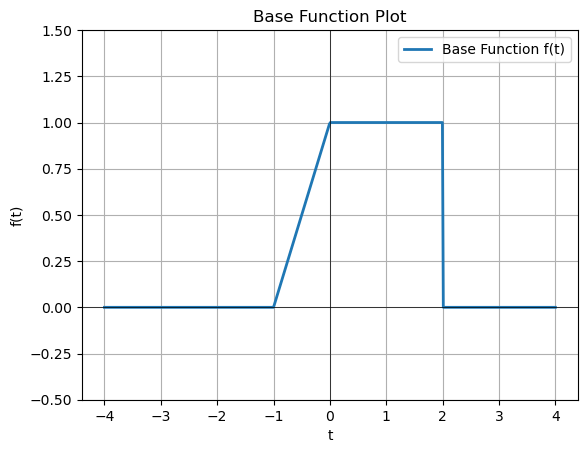

In [96]:
t_values = np.linspace(-4, 4, 500)
f_values = np.array([base_signal(t) for t in t_values])

# Restrict the range of f_values
f_min, f_max = -0.5, 1.5  # Define your desired f range
f_values[(f_values < f_min) | (f_values > f_max)] = np.nan  # Set out-of-range values to NaN

# Plot the function
plt.plot(t_values, f_values, label="Base Function f(t)", linewidth=2)
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Base Function Plot")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim(f_min, f_max)
plt.legend()
plt.show()

---

#### before heading to the signal transformation...
Before diving into signal transformations, let's define a function for plotting. This will make the plotting process easier, cleaner, and more modular.

Read the explanation carefully, especially regarding the function parameters, so that you can use it correctly without confusion later.
check below:

In [99]:
def plot_signals(signals, f_min=-0.5, f_max=1.5, title="Signal Plot", figsize=(8, 5), x_step=0.5):
    """
    Plots multiple signals on the same figure.

    Parameters:
    - signals: list of tuples [(t_values1, f_values1, label1, style1, color1), (t_values2, f_values2, ...)]
    - f_min: float, lower limit for f-values.
    - f_max: float, upper limit for f-values.
    - title: str, title of the plot.
    - figsize: tuple, figure size (width, height).
    - x_step: float, step size for x-axis ticks.
    """
    plt.figure(figsize=figsize)

    for t_values, f_values, label, style, color in signals:
        # Restrict the range of f_values
        f_values = np.where((f_values < f_min) | (f_values > f_max), np.nan, f_values)

        # Plot the function
        plt.plot(t_values, f_values, label=label, linestyle=style, linewidth=2, color=color)

    # Labels and grid
    plt.xlabel("t")
    plt.ylabel("f(t)")
    plt.title(title)
    plt.grid(True)

    # Draw axes
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    # Set x-axis ticks at intervals of at least 0.5
    x_min, x_max = min(signals[0][0]), max(signals[0][0])  # Get range from the first signal
    plt.xticks(np.arange(np.floor(x_min), np.ceil(x_max) + x_step, step=x_step))

    # Set y-axis limits
    plt.ylim(f_min, f_max)

    # Add legend and show
    plt.legend()
    plt.show()

and this is a simple usage of that ploting:

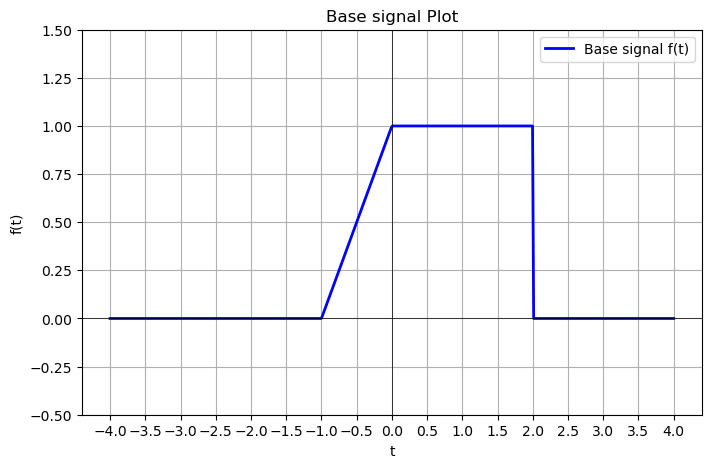

In [102]:
# Generate time values
t_values = np.linspace(-4, 4, 500)

# Compute function values
f_values = np.array([base_signal(t) for t in t_values])

# Define signals list in the correct format
signals = [
    (t_values, f_values, "Base signal f(t)", "solid", "blue")  # (t, f, label, style, color)
]

# Call the function to plot
plot_signals(signals, f_min=-0.5, f_max=1.5, title="Base signal Plot")


ok, now let's head to the transformation!

---

## time shift
As shown on the book, time shift is defined like below:
$$
f(t) \rightarrow f(t-t_0)
$$
now, we make that time shift by implementing the `time_shifter` function below:

In [105]:
def time_shifter(f, t_values, t0):
    """Shifts the signal f(t) by t0 units"""
    return np.array([f(t - t0) for t in t_values])

now, let's plot that to see the changes...

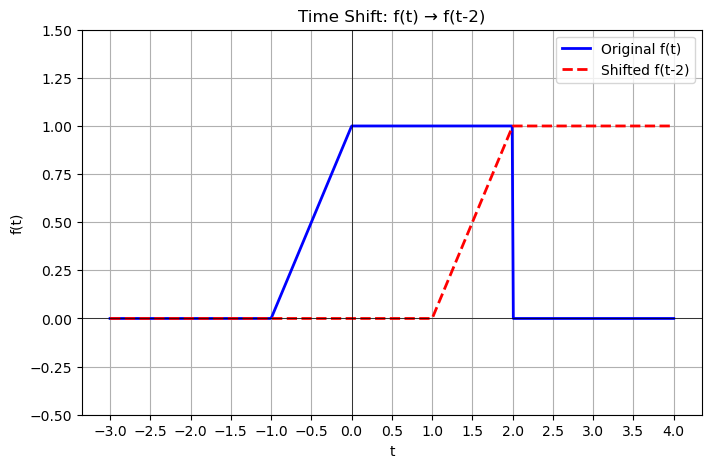

In [112]:
# Generate time values
t_values = np.linspace(-3, 4, 500)

# Compute original and shifted function values
f_values = np.array([base_signal(t) for t in t_values])
t0 = 2  # Shift amount
shifted_f_values = time_shifter(base_signal, t_values, t0)

# Define signals list in the correct format
signals = [
    (t_values, f_values, "Original f(t)", "solid", "blue"),
    (t_values, shifted_f_values, f"Shifted f(t-{t0})", "dashed", "red")
]

# Call the function to plot both signals
plot_signals(signals, f_min=-0.5, f_max=1.5, title=f"Time Shift: f(t) → f(t-{t0})")

you may also change the $t_0$ value to check any other shifts.

---

## time reverse
now, like befor, we define a time reverser function that implements this:
$$
f(t) \rightarrow f(-t)
$$

In [116]:
def time_reverser(f, t_values):
    """Reverses the signal f(t) to f(-t)"""
    return np.array([f(-t) for t in t_values])

now, let's do the plotting:

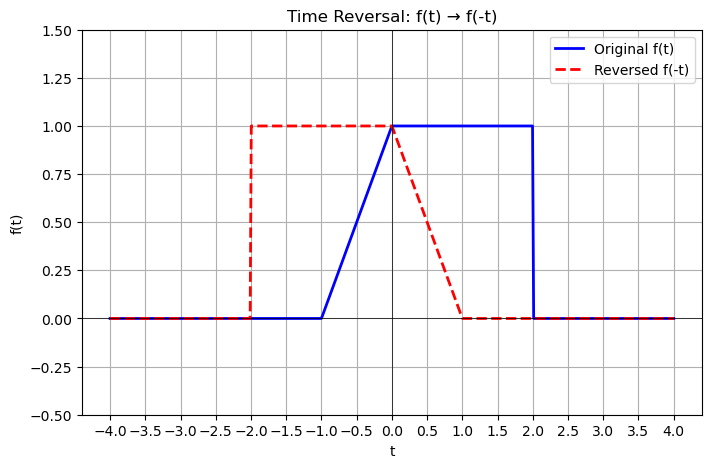

In [119]:
# Generate time values
t_values = np.linspace(-4, 4, 500)

# Compute original and reversed function values
f_values = np.array([base_signal(t) for t in t_values])
reversed_f_values = time_reverser(base_signal, t_values)

# Define signals list in the correct format
signals = [
    (t_values, f_values, "Original f(t)", "solid", "blue"),
    (t_values, reversed_f_values, "Reversed f(-t)", "dashed", "red")
]

# Call the function to plot both signals
plot_signals(signals, f_min=-0.5, f_max=1.5, title="Time Reversal: f(t) → f(-t)")


---

## time scaling
this must be a little bit more complicated, 
$$
f(t) \rightarrow f(at)
$$
as This means every occurrence of $t$ in $f(t)$ is replaced with $at$. the effect of scaling factor $at$ is:

- 
$
\text{If } |a| > 1, \text{ the function compresses (shrinks in time).}
$

- 
$
\text{If } 0 < |a| < 1, \text{ the function stretches (expands in time).}
$

- 
$
\text{If } a < 0, \text{ the function is also time-reversed in addition to scaling.}
$

yet the implementation is just like what we explored befor. we define a time_scaler function:

In [122]:
def time_scaler(f, t_values, a):
    """Scales the signal f(t) by factor a, resulting in f(at)"""
    return np.array([f(a * t) for t in t_values])

now, let's do the plotting.

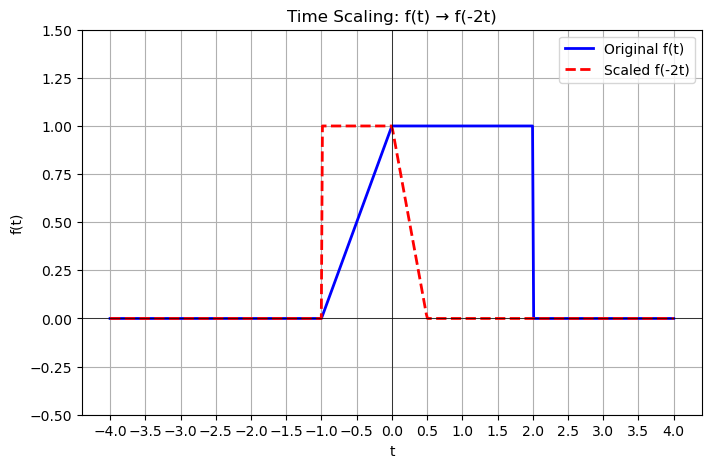

In [125]:
# Generate time values
t_values = np.linspace(-4, 4, 500)

# Compute original and scaled function values
f_values = np.array([base_signal(t) for t in t_values])

# Example scaling factor
a = -2  # Time compression (f(2t))
scaled_f_values = time_scaler(base_signal, t_values, a)

# Define signals list in the correct format
signals = [
    (t_values, f_values, "Original f(t)", "solid", "blue"),
    (t_values, scaled_f_values, f"Scaled f({a}t)", "dashed", "red")
]

# Call the function to plot both signals
plot_signals(signals, f_min=-0.5, f_max=1.5, title=f"Time Scaling: f(t) → f({a}t)")

as befor, you may also change the value for $a$ to see how it affects the signal, just make sure you change the ploting axis acordingly, to not miss details.

---

## the full transformation
now that we implemented the 3 different transformation for the continous time independent variable, let's see how would that work on its most general case:
$$
f(t) \rightarrow f(at + t_0)
$$
for doint that, there sould be a function that prioritize the transformation, named `prioritizer`. Implement that according to the course slides, and call those 3 functions.

In [129]:
def prioritizer(f, t_values, a, t0):
    """Applies the full transformation: f(t) → f(at + t0)"""
    shifted_values = time_shifter(f, t_values, t0)
    scaled_values = time_scaler(lambda t: base_signal(t - t0), t_values, a)
    return scaled_values

now, let's do the plotting and make sure that it works.

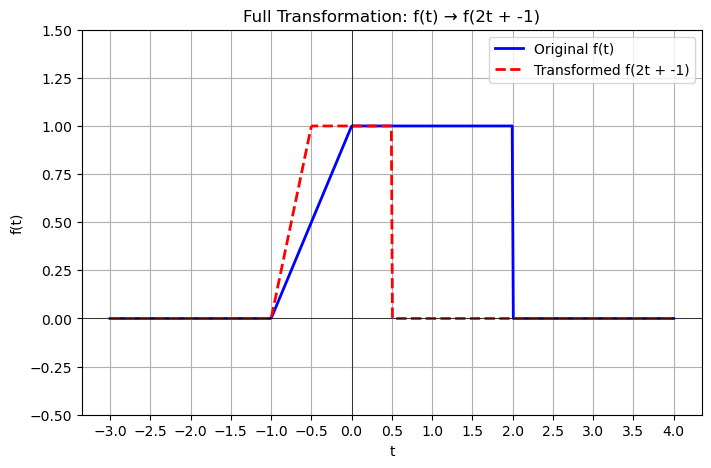

In [134]:
# Generate time values
t_values = np.linspace(-3, 4, 500)

# Compute original function values
f_values = np.array([base_signal(t) for t in t_values])

# Transformation parameters
a = 2    # Time scaling factor
t0 = -1  # Time shift

# Apply full transformation using `prioritizer`
transformed_f_values = prioritizer(base_signal, t_values, a, t0)

# Define signals list in the correct format
signals = [
    (t_values, f_values, "Original f(t)", "solid", "blue"),
    (t_values, transformed_f_values, f"Transformed f({a}t + {t0})", "dashed", "red")
]

# now, call the function to plot both signals
plot_signals(signals, f_min=-0.5, f_max=1.5, title=f"Full Transformation: f(t) → f({a}t + {t0})")

You may also change the values for $a$ and $t_0$ as well, to make sure you did the job right.

---

In [147]:
def discrete_base_signal(n):
    """
    Discrete version of base_signal(t).
    Defined only for discrete time indices n.
    """
    if -1 <= n < 0:
        return n + 1
    elif 0 <= n <= 2:
        return 1
    else:
        return 0


In [149]:
n_values = np.arange(-4, 5)  # Discrete indices from -4 to 4
x_n = np.array([discrete_base_signal(n) for n in n_values])


In [155]:

def plot_discrete_signals(signals, f_min=-0.5, f_max=1.5, title="Discrete Signal Plot", figsize=(8, 5), x_step=1):
    """
    Plots multiple discrete-time signals using stem plots.

    Parameters:
    - signals: list of tuples [(n_values1, x_values1, label1, marker_color1, stem_color1), (n_values2, x_values2, ...)]
    - f_min: float, lower limit for x-values.
    - f_max: float, upper limit for x-values.
    - title: str, title of the plot.
    - figsize: tuple, figure size (width, height).
    - x_step: float, step size for x-axis ticks.
    """
    plt.figure(figsize=figsize)

    for n_values, x_values, label, marker_color, stem_color in signals:
        # Restrict the range of x_values
        x_values = np.where((x_values < f_min) | (x_values > f_max), np.nan, x_values)

        # Plot the discrete signal using stem (Fixed)
        markerline, stemlines, baseline = plt.stem(n_values, x_values)  
        markerline.set_color(marker_color)
        stemlines.set_color(stem_color)

    # Labels and grid
    plt.xlabel("n (Discrete Time Index)")
    plt.ylabel("x[n]")
    plt.title(title)
    plt.grid(True)

    # Draw axes
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    # Set x-axis ticks at intervals of at least 1
    x_min, x_max = min(signals[0][0]), max(signals[0][0])  # Get range from the first signal
    plt.xticks(np.arange(np.floor(x_min), np.ceil(x_max) + x_step, step=x_step))

    # Set y-axis limits
    plt.ylim(f_min, f_max)

    # Add legend and show
    plt.legend()
    plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_1128\2095432042.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


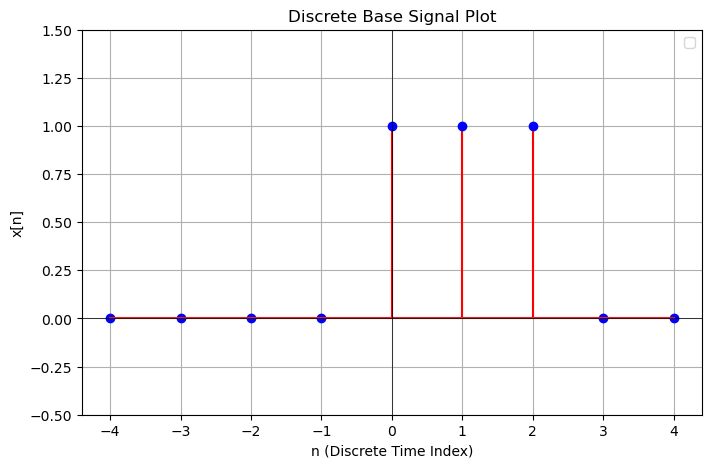

In [157]:
# Generate discrete time indices
n_values = np.arange(-4, 5)  

# Compute discrete function values
x_n = np.array([discrete_base_signal(n) for n in n_values])

# Define signals list in the correct format
signals = [
    (n_values, x_n, "Discrete Base Signal", "blue", "red")  
]

# Call the function to plot the discrete signal
plot_discrete_signals(signals, f_min=-0.5, f_max=1.5, title="Discrete Base Signal Plot")